In [1]:
import pandas as pd

from data_processing import correct_nasal_vowel_transcripts
from stats import SuffixAverage
from visualization import view_curve

## Suffix vs Non-suffix Words

In [2]:
nlexique = pd.read_csv('../data/nlexique.csv')
nlexique['sg'] = nlexique['sg'].apply(correct_nasal_vowel_transcripts)
nlexique

,lexeme,variants,gen,sg,pl
0,à-côté,à-côté:accoté,m,akOte,akOte
1,à-coup,à-coup,m,aku,aku
2,à-peu-près,à-peu-près,m,apØpʁɛ,apØpʁɛ
3,à-pic,à-pic,m,apik,apik
4,à-plat,à-plat:aplat,m,apla,apla
...,...,...,...,...,...
31000,zurichois,zurichois,m,zyʁikwa,zyʁikwa
31001,zydeco,zydeco,f,zidəko,zidəko
31002,zygoma,zygoma,m,zigOma,zigOma
31003,zygote,zygote,m,zigɔt,zigɔt


In [3]:
echantinom = pd.read_csv('../data/Echantinom-full-20210902.csv')

echantinom = (echantinom[~echantinom['lemma'].isin(nlexique[nlexique['gen'] == 'b']['lexeme'])] # rows
                       [['lemma', 'phon', 'gen', 'suffix', 'suffix_broad']]    # columns
                       .fillna(0)
                       .reset_index(drop=True)
                       )

echantinom = (pd.merge(echantinom, nlexique, left_on='lemma', right_on='lexeme', how='left', suffixes=('', '_y'))
               .drop(columns=['lexeme', 'phon', 'gen_y'])
               .dropna()
               .reset_index(drop=True)
               )
echantinom

,lemma,gen,suffix,suffix_broad,variants,sg,pl
0,berlingue,m,0,0,berlingue,bɛʁl3g,bɛʁlɛ̃g
1,corton,m,on,on,corton,kɔʁt2,kɔʁtɔ̃
2,dabuche,f,uche,Vche,dabuche,dabyʃ,dabyʃ
3,faf,m,0,0,faf,faf,faf
4,gail,f,0,0,gail,gaj,gaj
...,...,...,...,...,...,...,...
4527,palu,m,0,0,palu:palus,paly,paly
4528,talc,m,0,0,talc,talk,talk
4529,sauvetage,m,age,age,sauvetage,sOvətaʒ,sOvətaʒ
4530,plaid,m,0,0,plaid,plɛd,plɛd


### Orthographic forms

In [9]:
orth_preds = pd.read_csv('../results/echantinom_orth_preds_new.csv')
# orth_preds = orth_preds.join(echantinom.set_index('lemma')[['suffix']], on='Form').drop_duplicates().reset_index(drop=True)
# orth_preds.to_csv('../results/echantinom_orth_preds_new.csv', index=None)
orth_preds

,Form,Alt Form,Predicted Gender,True Gender,Class Probabilities,Set,suffix
0,as,as,m,m,"[('s', {'m': 0.7471755743026733, 'f': 0.252824...",test,0
1,bi,bi,m,m,"[('i', {'m': 0.8639552593231201, 'f': 0.136044...",test,0
2,an,1,m,m,"[('n', {'m': 0.5575430989265442, 'f': 0.442456...",test,0
3,té,te,m,m,"[('é', {'m': 0.7031861543655396, 'f': 0.296813...",test,0
4,bug,bœg,m,m,"[('g', {'m': 0.673121988773346, 'f': 0.3268779...",test,0
...,...,...,...,...,...,...,...
4526,sous-alimentation,suzalim1tasj2,f,f,"[('n', {'m': 0.5575430989265442, 'f': 0.442456...",test,ion
4527,approvisionnement,apʁOvizjɔnəm1,m,m,"[('t', {'m': 0.7258150577545166, 'f': 0.274184...",test,ment
4528,cul-de-basse-fosse,kydəbasəfos,m,m,"[('e', {'m': 0.5705230236053467, 'f': 0.429476...",test,0
4529,transsubstantiation,tʁ1ssypst1tjasj2,f,f,"[('n', {'m': 0.5575430989265442, 'f': 0.442456...",test,ion


In [10]:
orth_correct = orth_preds[orth_preds['Predicted Gender'] == orth_preds['True Gender']]

orth_percentage_correct = (orth_correct.shape[0] / orth_preds.shape[0]) * 100
orth_percentage_correct


90.53189141469873

In [11]:
incorrect = orth_preds[orth_preds['Predicted Gender'] != orth_preds['True Gender']]
incorrect.sample(5)

,Form,Alt Form,Predicted Gender,True Gender,Class Probabilities,Set,suffix
687,gouge,guʒ,m,f,"[('e', {'m': 0.5705230236053467, 'f': 0.429476...",test,0
378,combe,k2b,m,f,"[('e', {'m': 0.5705230236053467, 'f': 0.429476...",test,0
1059,madame,madam,m,f,"[('e', {'m': 0.5705230236053467, 'f': 0.429476...",test,0
210,cage,kaʒ,m,f,"[('e', {'m': 0.5705230236053467, 'f': 0.429476...",test,0
1495,poudre,pudʁ,m,f,"[('e', {'m': 0.5705230236053467, 'f': 0.429476...",test,0


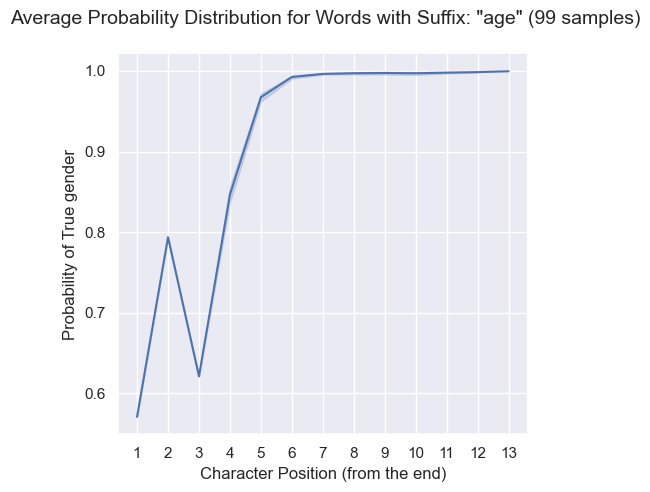

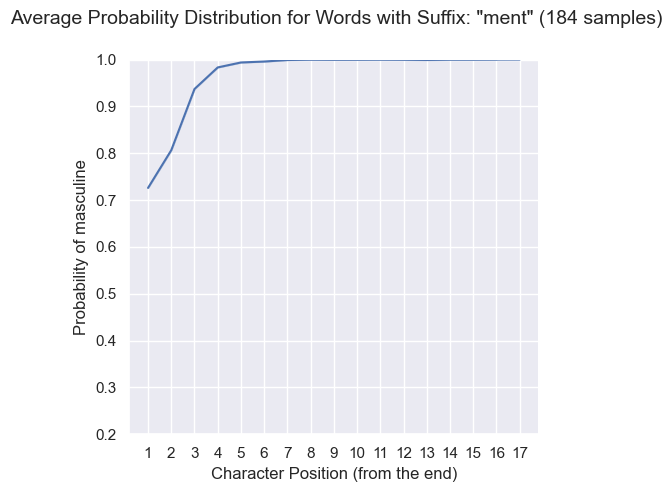

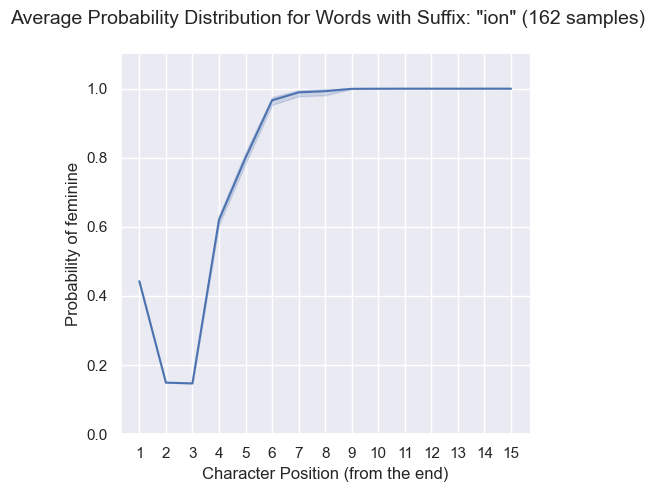

In [27]:
"""Uncomment to view the curves of individual example words"""
"""
Possible values for scale: 
- True (scales from 0 to 1), 
- False (default behavior), 
- List[int|float, int|float]: custom scaling range
"""

# view_curve(['passage'], orth_preds, binary=True, gender='f', display_probs=True, scale=False)
# print('-' * 100 + '\n')
# view_curve(['lignage'], orth_preds, binary=True, gender='f')
# print('-' * 100 + '\n')
# view_curve(['bâtiment'], orth_preds, binary=True, gender='f')
# print('-' * 100 + '\n')
# view_curve(['virement'], orth_preds, binary=True, gender='f')
# print('-' * 100 + '\n')
# view_curve(['formation'], orth_preds, binary=True, gender='f')
# print('-' * 100 + '\n')
# view_curve(['gradation'], orth_preds, binary=True, gender='f')

age_avg = SuffixAverage(orth_preds, 'age')
age_avg.plot(gender='True', scale=False)

ment_avg = SuffixAverage(orth_preds, 'ment')
ment_avg.plot(gender='m', scale=[0.2, 1])

ion_avg = SuffixAverage(orth_preds, 'ion')
ion_avg.plot(gender='f', scale=[0, 1.1], min_dp=3)

In [13]:
orth_preds_x10 = pd.read_csv('../results/echantinom_orth_preds_x10_new.csv')
# orth_preds_x10 = orth_preds_x10.join(echantinom.set_index('lemma')[['suffix']], on='Form').drop_duplicates().reset_index(drop=True)
# orth_preds_x10.to_csv('../results/echantinom_orth_preds_x10_new.csv', index=None)

In [ ]:
"""Uncomment to view the curves of an example word at each run"""

# view_curve(['gradation'], orth_preds_x10, binary=True, gender='True', multiruns=True, display_probs=True, scale=[0, 1.1])

'Uncomment to view the curves of an example word at each run'

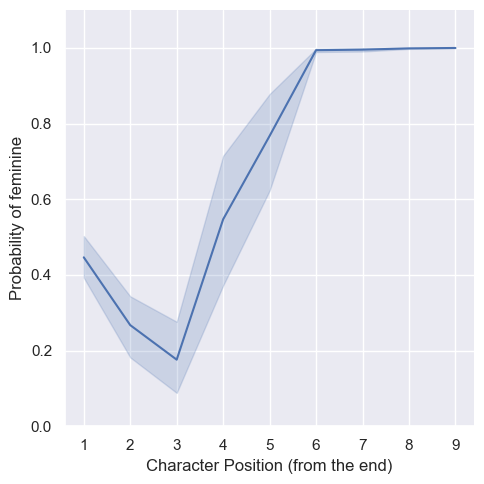

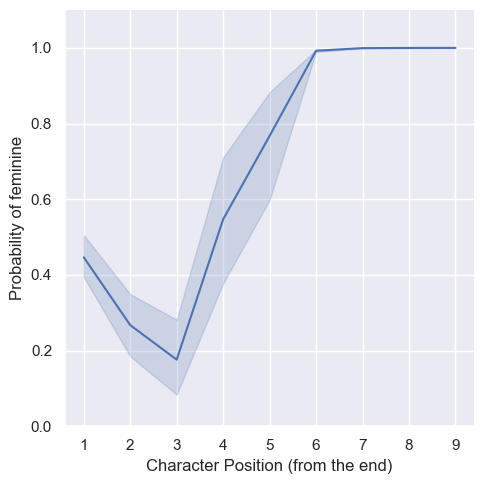

In [26]:
"""Average curve of an example word over multiple runs"""

sfx_avg = SuffixAverage(orth_preds_x10.query("Form == 'gradation'"), 'ion')
sfx_avg.plot(gender='f', title=False, scale=[0, 1.1])

sfx_avg = SuffixAverage(orth_preds_x10.query("Form == 'sensation'"), 'ion')
sfx_avg.plot(gender='f', title=False, scale=[0, 1.1])

### Phonetic forms

In [16]:
phon_preds = pd.read_csv('../results/echantinom_phon_preds_new.csv')
# phon_preds = (phon_preds.join(echantinom.set_index('sg')[['suffix']], on='Form')
#               .drop_duplicates('Alt Form')
#               .reset_index(drop=True)
#               )
# phon_preds.to_csv('../results/echantinom_phon_preds_new.csv', index=None)
phon_preds

,Form,Alt Form,Predicted Gender,True Gender,Class Probabilities,Set,suffix
0,o,eau,m,f,"[('o', {'m': 0.6905112266540527, 'f': 0.309488...",test,0
1,ɛ,ais,m,m,"[('ɛ', {'m': 0.6576897501945496, 'f': 0.342310...",test,0
2,ɛ,haie,m,m,"[('ɛ', {'m': 0.6576897501945496, 'f': 0.342310...",test,0
3,1,an,m,m,"[('1', {'m': 0.6691492199897766, 'f': 0.330850...",test,0
4,4,hun,m,m,"[('4', {'m': 0.580463171005249, 'f': 0.4195368...",test,0
...,...,...,...,...,...,...,...
4526,tɛʁʒivɛʁsasj2,tergiversation,f,f,"[('2', {'m': 0.7829316258430481, 'f': 0.217068...",test,ion
4527,suzalim1tasj2,sous-alimentation,f,f,"[('2', {'m': 0.7829316258430481, 'f': 0.217068...",test,ion
4528,ʁəstʁyktyʁasj2,restructuration,f,f,"[('2', {'m': 0.7829316258430481, 'f': 0.217068...",test,ion
4529,tʁadisjOnalizm,traditionalisme,m,m,"[('m', {'m': 0.2641342580318451, 'f': 0.735865...",test,isme


In [17]:
phon_correct = phon_preds[phon_preds['Predicted Gender'] == phon_preds['True Gender']]

phon_percentage_correct = (phon_correct.shape[0] / phon_preds.shape[0]) * 100
phon_percentage_correct


82.01280070624586

In [18]:
phon_incorrect = phon_preds[phon_preds['Predicted Gender'] != phon_preds['True Gender']]
phon_incorrect.sample(5)

,Form,Alt Form,Predicted Gender,True Gender,Class Probabilities,Set,suffix
3107,wiljams,williams,m,f,"[('s', {'m': 0.41614797711372375, 'f': 0.58385...",test,0
942,sɥœʁ,sueur,m,f,"[('ʁ', {'m': 0.6121921539306641, 'f': 0.387807...",test,eurF
3122,k2tʁədi,contredit,f,m,"[('i', {'m': 0.4570144712924957, 'f': 0.542985...",test,0
4506,pɛʁp1dikylɛʁ,perpendiculaire,m,f,"[('ʁ', {'m': 0.6121921539306641, 'f': 0.387807...",test,aire
2375,kasdal,casse-dalle,f,m,"[('l', {'m': 0.6111104488372803, 'f': 0.388889...",test,0


In [19]:
phon_preds[phon_preds['Alt Form'].isin(['passage', 'lignage', 'bâtiment', 'virement', 'formation', 'gradation'])]

,Form,Alt Form,Predicted Gender,True Gender,Class Probabilities,Set,suffix
1297,liɲaʒ,lignage,m,m,"[('ʒ', {'m': 0.4601134657859802, 'f': 0.539886...",test,age
1490,pasaʒ,passage,m,m,"[('ʒ', {'m': 0.4601134657859802, 'f': 0.539886...",test,age
2423,viʁəm1,virement,m,m,"[('1', {'m': 0.6691492199897766, 'f': 0.330850...",test,ment
2495,batim1,bâtiment,m,m,"[('1', {'m': 0.6691492199897766, 'f': 0.330850...",test,ment
3734,gʁadasj2,gradation,f,f,"[('2', {'m': 0.7829316258430481, 'f': 0.217068...",test,ion
3913,fɔʁmasj2,formation,f,f,"[('2', {'m': 0.7829316258430481, 'f': 0.217068...",test,ion


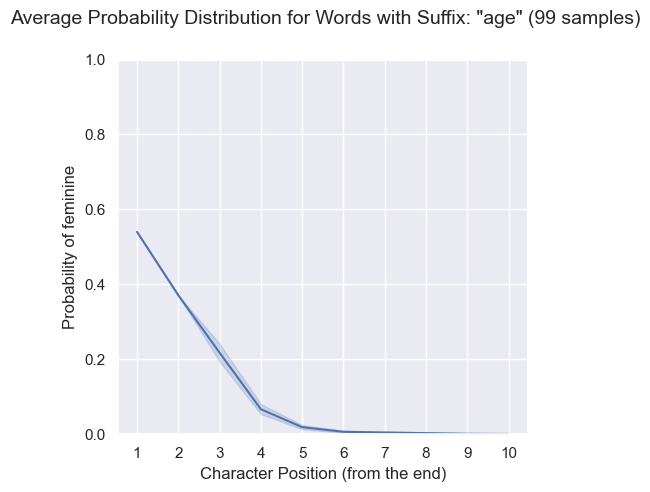

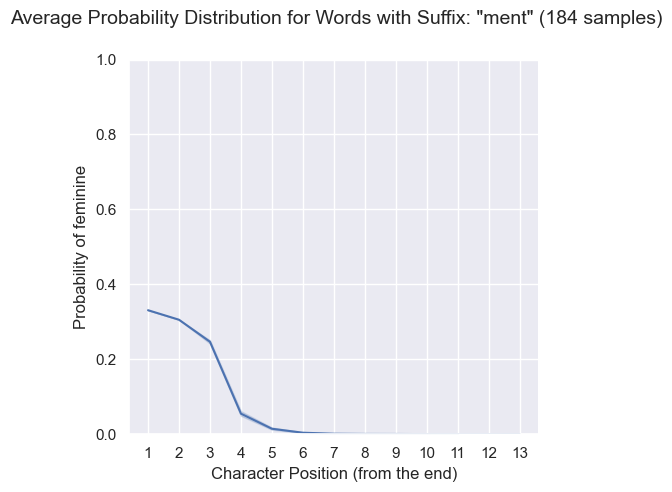

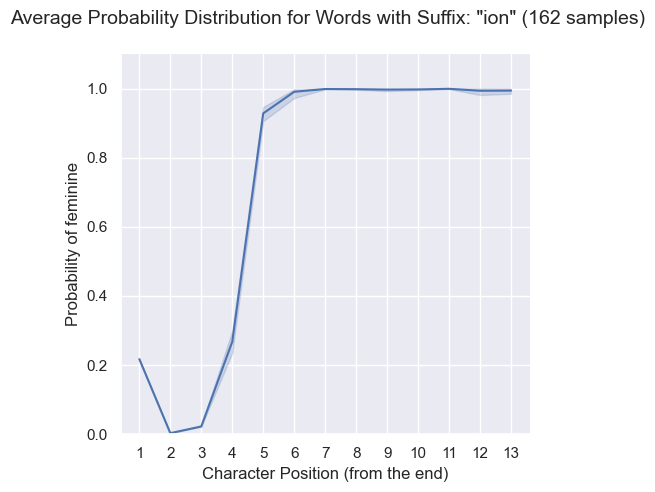

In [28]:
"""Uncomment to view the curves of individual example words"""

# view_curve(['pasaʒ'], phon_preds, binary=True, gender='f', scale=True)
# print('-' * 100 + '\n')
# view_curve(['liɲaʒ'], phon_preds, binary=True, gender='f', scale=True)
# print('-' * 100 + '\n')
# view_curve(['batim1'], phon_preds, binary=True, gender='f', scale=True)
# print('-' * 100 + '\n')
# view_curve(['viʁəm1'], phon_preds, binary=True, gender='f', scale=True)
# print('-' * 100 + '\n')
# view_curve(['fɔʁmasj2'], phon_preds, binary=True, gender='f', scale=True)
# print('-' * 100 + '\n')
# view_curve(['gʁadasj2'], phon_preds, binary=True, gender='f', scale=True)

age_avg = SuffixAverage(phon_preds, 'age')
age_avg.plot(gender='f', scale=True)

ment_avg = SuffixAverage(phon_preds, 'ment')
ment_avg.plot(gender='f', scale=True)

ion_avg = SuffixAverage(phon_preds, 'ion')
ion_avg.plot(gender='f', scale=[0, 1.1], min_dp=3)

In [22]:
phon_preds_x10 = pd.read_csv('../results/echantinom_phon_preds_x10_new.csv')
# phon_preds_x10 = (phon_preds_x10.join(echantinom.set_index('sg')[['suffix']], on='Form')
#                   .drop_duplicates()
#                   .reset_index(drop=True)
#                   )
# phon_preds_x10.to_csv('../results/echantinom_phon_preds_x10_new.csv', index=None)
phon_preds_x10

,Form,Predicted Gender,True Gender,Class Probabilities,Set,Run,suffix
0,ɛ,m,f,"[('ɛ', {'m': 0.6685084104537964, 'f': 0.331491...",test,1,0
1,1,m,m,"[('1', {'m': 0.8267455697059631, 'f': 0.173254...",test,1,0
2,4,m,m,"[('4', {'m': 0.7416870594024658, 'f': 0.258312...",test,1,0
3,u,m,m,"[('u', {'m': 0.3996814787387848, 'f': 0.600318...",test,1,0
4,o,m,f,"[('o', {'m': 0.6201976537704468, 'f': 0.379802...",test,1,0
...,...,...,...,...,...,...,...
45365,3k2patibilite,f,f,"[('e', {'m': 0.6420694589614868, 'f': 0.357930...",test,10,ité
45366,k2fid1sjalite,f,f,"[('e', {'m': 0.6420694589614868, 'f': 0.357930...",test,10,ité
45367,ʁəstʁyktyʁasj2,f,f,"[('2', {'m': 0.5244074463844299, 'f': 0.475592...",test,10,ion
45368,tʁadisjOnalizm,m,m,"[('m', {'m': 0.33775582909584045, 'f': 0.66224...",test,10,isme


In [ ]:
"""Uncomment to view the curves of an example word at each run"""

# view_curve(['gʁadasj2'], phon_preds_x10, binary=True, gender='f', multiruns=True)

'Uncomment to view the curves of an example word at each run'

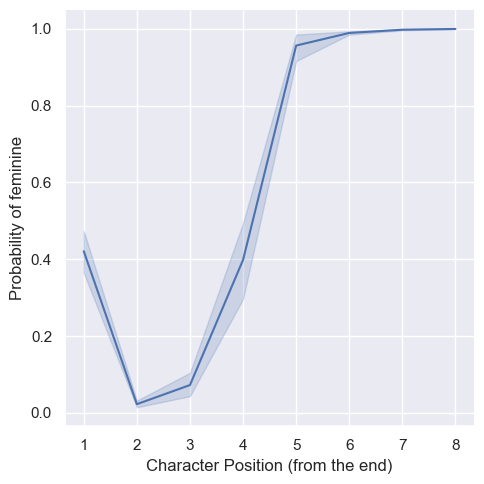

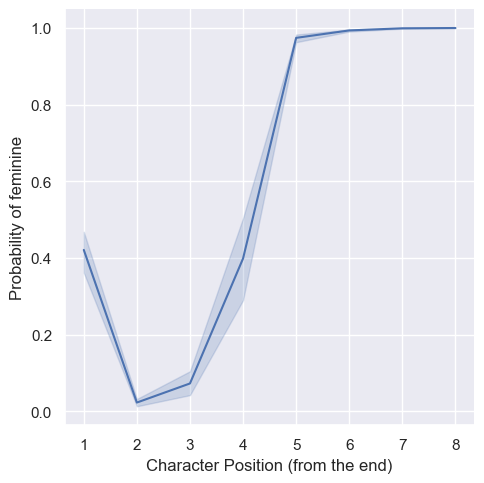

In [23]:
"""Average curve of an example word over multiple runs"""

sfx_avg = SuffixAverage(phon_preds_x10.query("Form == 'gʁadasj2'"), 'ion')
sfx_avg.plot(gender='f', title=False)

sfx_avg = SuffixAverage(phon_preds_x10.query("Form == 'fɔʁmasj2'"), 'ion')
sfx_avg.plot(gender='f', title=False)

In [ ]:
# [word for word in orth_preds_x10['Form'].tolist() if word.endswith('tion')]

### Comparing plots of multiple words

Run 1 of 10:


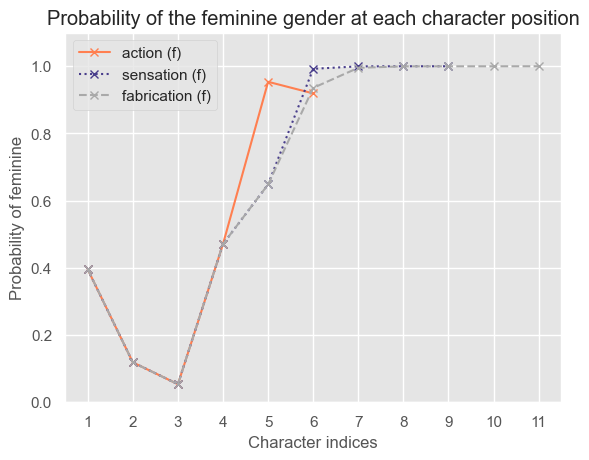

Run 2 of 10:


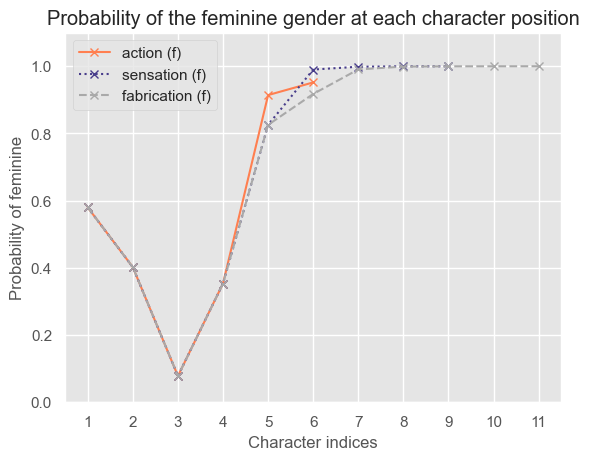

Run 3 of 10:


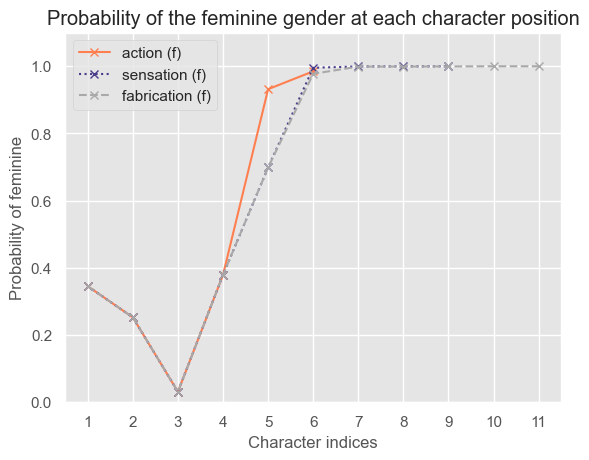

Run 4 of 10:


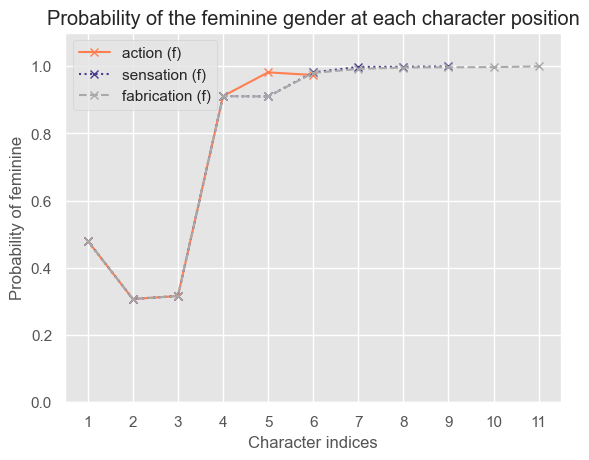

Run 5 of 10:


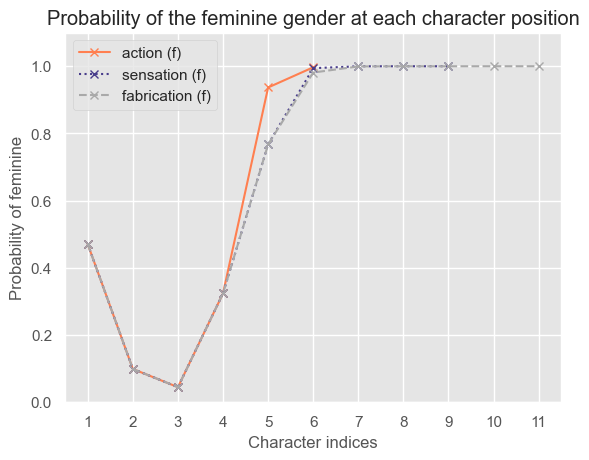

Run 6 of 10:


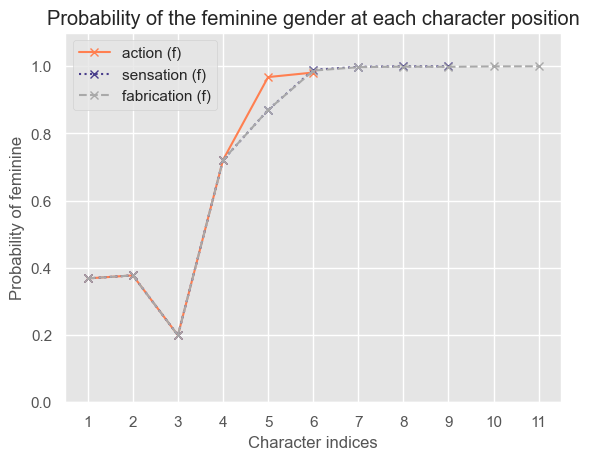

Run 7 of 10:


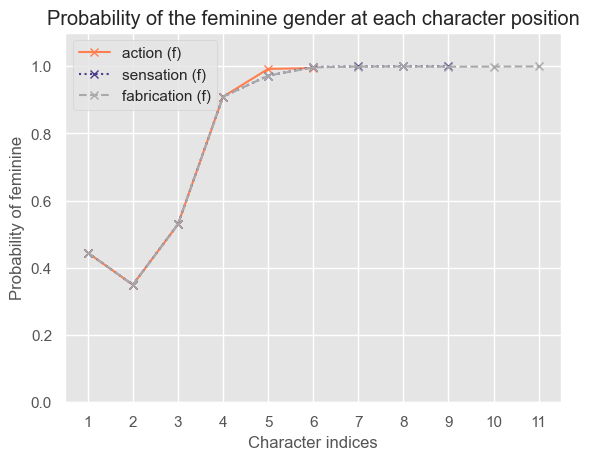

Run 8 of 10:


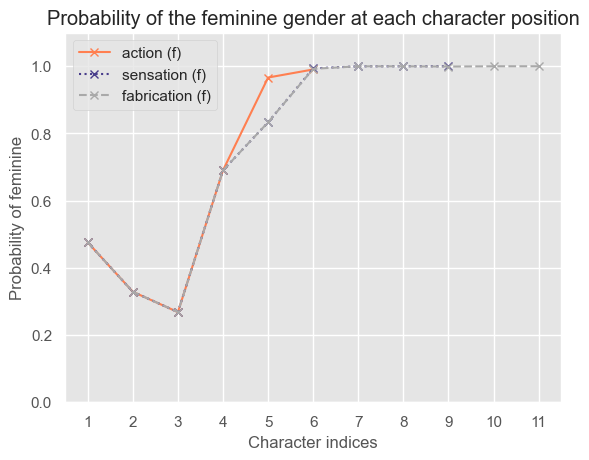

Run 9 of 10:


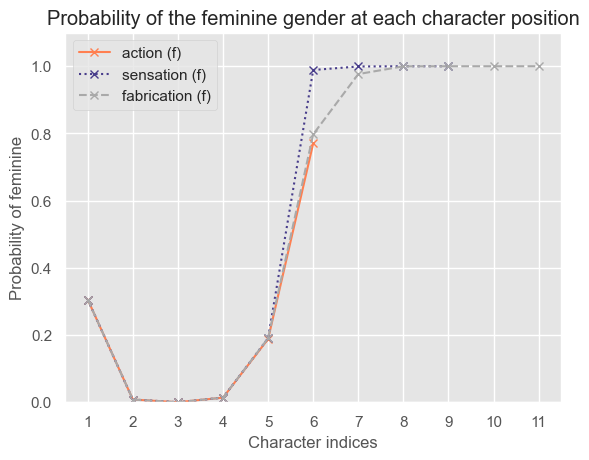

Run 10 of 10:


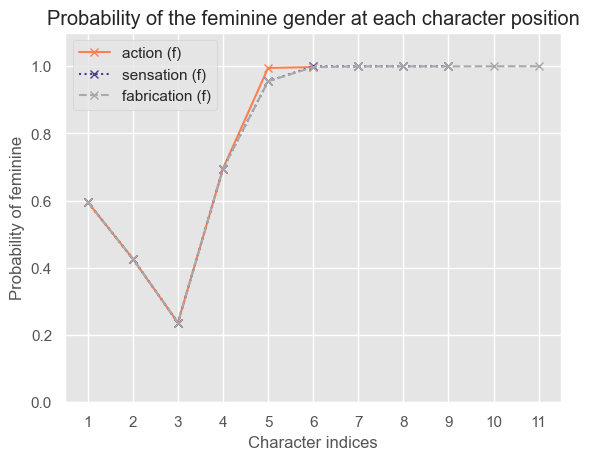

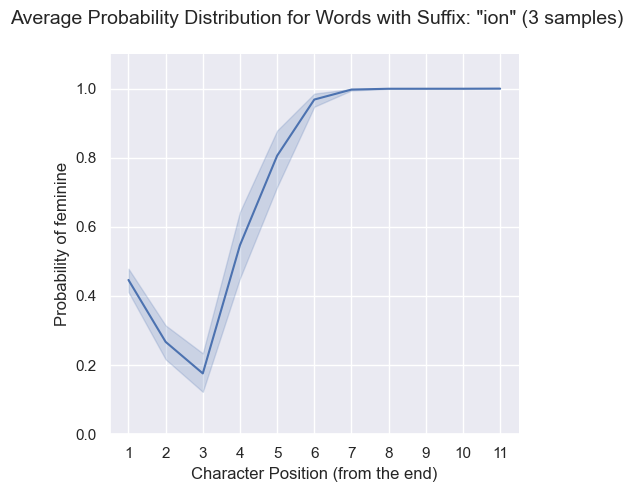

In [24]:
# view_curve(['emballage', 'repassage', 'nettoyage'], orth_preds_x10, binary=True, gender='m', multiruns=True, scale=[0, 1.1])
# suffix_avg_plot(orth_preds_x10.query("Form in ['emballage', 'repassage', 'nettoyage']"), 'age', gender='m', scale=[0, 1.1])

view_curve(['action', 'sensation', 'fabrication'], orth_preds_x10, binary=True, gender='f', multiruns=True, scale=[0, 1.1])
sfx_avg = SuffixAverage(orth_preds_x10.query("Form in ['action', 'sensation', 'fabrication']"), 'ion')
sfx_avg.plot(gender='f', scale=[0, 1.1])